In [68]:
from keras.datasets import cifar10
from keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Dataset Loading

In [47]:
(trainX, trainY), (testX, testY) = cifar10.load_data()


# Data Processing

In [48]:
print('[INFO] train data...')
print(trainX[0])
print()

print('[INFO] train labels...')
print(trainY[0])
print()

print('[INFO] train data shape...')
print(trainX.shape)
print()

print('[INFO] train data type...')
print(type(trainX))
print()

print('[INFO] train labels shape...')
print(trainY.shape)
print()

print('[INFO] test data...')
print(testX[0])
print()

print('[INFO] test labels..')
print(testY[0])
print()

print('[INFO] test data shape')
print(testX.shape)
print()

print('[INFO] test labels shape')
print(testY.shape)
print()

[INFO] train data...
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

[INFO] train labels...
[6]

[INFO] train data shape...
(50000, 32, 32, 3)

[INFO] train data type...
<class 'numpy.ndarray'>

[INFO] train labels shape...
(50000, 1)

[INFO] test data...
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [

In [49]:
# Normalizing data 
trainX = trainX.astype('float') / 255.0
testX = testX.astype('float') / 255.0

# Flattening the data
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

In [50]:
print('[INFO] train data...')
print(trainX[0])
print()

print('[INFO] train data shape...')
print(trainX.shape)
print()

print('[INFO] test data...')
print(testX[0])
print()

print('[INFO] test data shape...')
print(testX.shape)
print()

[INFO] train data...
[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]

[INFO] train data shape...
(50000, 3072)

[INFO] test data...
[0.61960784 0.43921569 0.19215686 ... 0.08235294 0.2627451  0.43137255]

[INFO] test data shape...
(10000, 3072)



In [51]:
# Creating Vectors for labels using one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [52]:
print('[INFO] train labels...')
print(trainY[0])
print()

print('[INFO] test labels...')
print(testY[0])
print()


[INFO] train labels...
[0 0 0 0 0 0 1 0 0 0]

[INFO] test labels...
[0 0 0 1 0 0 0 0 0 0]



In [53]:
# Train and Validation data split
(train_samples, validation_samples, train_labels, validation_labels) = train_test_split(trainX, trainY, test_size=0.25)

In [54]:
train_samples.shape

(37500, 3072)

In [55]:
train_labels.shape

(37500, 10)

In [56]:
validation_samples.shape

(12500, 3072)

In [57]:
validation_labels.shape

(12500, 10)

In [58]:
testX.shape

(10000, 3072)

In [59]:
testY.shape

(10000, 10)

# Model Definition

In [60]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(3072,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


# Model Compilation and Training

In [61]:
sgd = SGD(0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(train_samples, train_labels, epochs=100, batch_size=128, validation_data=(validation_samples, validation_labels))

Train on 37500 samples, validate on 12500 samples
Epoch 1/100
37500/37500 [==============================] - 12s 307us/step - loss: 1.9829 - acc: 0.2910 - val_loss: 1.8577 - val_acc: 0.3500
Epoch 2/100
37500/37500 [==============================] - 6s 156us/step - loss: 1.8164 - acc: 0.3626 - val_loss: 1.7778 - val_acc: 0.3745
Epoch 3/100
37500/37500 [==============================] - 6s 157us/step - loss: 1.7555 - acc: 0.3851 - val_loss: 1.7310 - val_acc: 0.3938
Epoch 4/100
37500/37500 [==============================] - 9s 243us/step - loss: 1.7066 - acc: 0.4039 - val_loss: 1.7050 - val_acc: 0.4021
Epoch 5/100
37500/37500 [==============================] - 6s 157us/step - loss: 1.6680 - acc: 0.4185 - val_loss: 1.6746 - val_acc: 0.4094
Epoch 6/100
37500/37500 [==============================] - 6s 157us/step - loss: 1.6356 - acc: 0.4312 - val_loss: 1.6618 - val_acc: 0.4106
Epoch 7/100
37500/37500 [==============================] - 10s 260us/step - loss: 1.6087 - acc: 0.4390 - val_loss: 

# Plotting Results

In [62]:
# Acquiring Data
history_dict = history.history
history_dict.keys()

accuracy = history_dict['acc']
validation_accuracy = history_dict['val_acc']

loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = np.arange(0, 100)

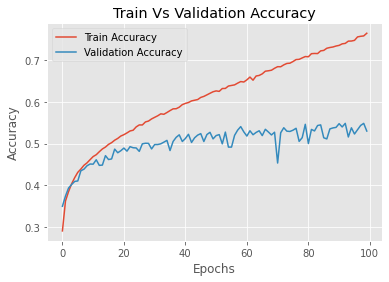

In [63]:
# Plotting training accuracy vs validation accuracy
plt.style.use('ggplot')
plt.plot(epochs, accuracy, label='Train Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Train Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

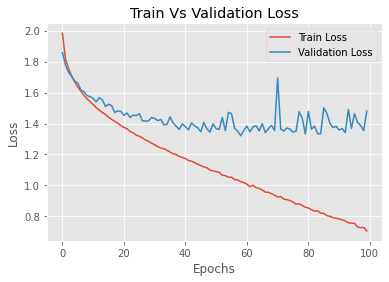

In [64]:
# Plotting training loss vs validation loss
plt.clf()
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Train Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation

In [65]:
results = model.evaluate(testX, testY)
results

10000/10000 [==============================] - 1s 143us/step


[1.4704725064277648, 0.5273000001907349]

# Predictions

In [69]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.58      0.64      0.61      1000
  automobile       0.53      0.75      0.62      1000
        bird       0.41      0.51      0.45      1000
         cat       0.39      0.27      0.32      1000
        deer       0.74      0.13      0.22      1000
         dog       0.44      0.47      0.45      1000
        frog       0.54      0.66      0.59      1000
       horse       0.64      0.57      0.61      1000
        ship       0.65      0.67      0.66      1000
       truck       0.52      0.61      0.56      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.51     10000
weighted avg       0.54      0.53      0.51     10000

